<img src="logounav.png" width="150" img style="float: right;"> 

**Analysis of Glassdoor Job Offers for Data Scientists**<br>
Author: Lucía Colín Cosano

The following notebook presents the deliverable related to data preparation and cleaning. For this purpose, a database related to job offers for data scientists published on Glassdoor has been selected.

The points covered in this notebook include:

- Problem definition and variable description.
- Data loading.
- Exploratory data analysis.
- Variable transformation.
- Visualization of distributions, identification of outliers, and correlation matrix.
- Modeling and analysis of results.
- Conclusions.

### PROBLEM DEFINITION AND VARIABLE DESCRIPTION.

**Glassdoor** is a website that provides information about companies, jobs, and salaries. It allows users to search and evaluate companies, read reviews written by current and former employees, and compare salaries and benefits across different industries and geographic regions. It also features a job interview section where users can read about the experiences of other candidates in the company's selection process.

Glassdoor is used by job seekers to learn about working conditions and corporate cultures at companies, and by companies to attract and retain talent.

The available dataset contains the following variables:

- **Index:** contains the observation number.
- **Job title:** refers to the job position being offered.
- **Salary estimate:** the salary range for the position expressed in dollars.
- **Job description:** a description of the job's responsibilities.
- **Rating:** the job offer's rating.
- **Company name:** the name of the company.
- **Location:** where the company's offices are located, where the work would be carried out.
- **Headquarters:** where the company's headquarters are located.
- **Size:** the size of the company, expressed in different ranges without specific quantities.
- **Founded:** the year in which the company was founded.
- **Type of ownership:** the type of company (public, private, etc.).
- **Industry:** the industry in which the company operates.
- **Sector:** the field in which the data scientist will work.
- **Revenue:** the company's total revenue.
- **Competitors:** a list of direct competitors.

Knowing the salary range in an industry or for a specific job is important when making decisions about a job offer because it allows for setting expectations, negotiating salaries, comparing job offers, and making proper financial planning. The goal is to predict the salary range using logistic regression. The metric used is accuracy.

### DATA LOADING.

First, the necessary libraries are imported to solve the problem, and the database is read.

In [1]:
import pandas as pd
import numpy as np

from skimpy import skim
import ydata_profiling

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.metrics import accuracy_score,recall_score,f1_score

In [2]:
df=pd.read_csv('DS_jobs.csv')

### EXPLORATORY DATA ANALYSIS

Once the dataset is read, an exploratory analysis of the samples to be analyzed will be conducted. To do this, the skim and pd.profiling functions will be used initially as they provide a quick overview of the database. The existence of null values and columns with unique values is checked.

In [3]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 672    │ │ string      │ 12    │                                                          │
│ │ Number of columns │ 15     │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean    ┃ sd     ┃ p0   ┃ p25     ┃ p75     ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ index               │     0 │        0 │     340 │    190 │    0 │     170 │     500 │     670 │  ██████   │  │
│ │ Rating              │     0 │        0 │     3.5 │    1.4 │   -1 │     3.3 │     4.3 │       5 │  ▁  ▁█▇   │  │
│ │ Founded             │     0 │        0 │    1600 │    760 │   -1 │    1900 │    2000 │    2000 │  ▂    █   │  │
│ └─────────────────────┴───────┴──────────┴─────────┴────────┴──────┴─────────┴─────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                       ┃ NA     ┃ NA %      ┃ words per row             ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Job Title                         │      0 │         0 │                       3.2 │                  2100 │  │
│ │ Salary Estimate                   │      0 │         0 │                       3.2 │                  2100 │  │
│ │ Job Description                   │      0 │         0 │                       3.2 │                  2100 │  │
│ │ Company Name                      │      0 │         0 │                       3.2 │                  2100 │  │
│ │ Location                          │      0 │         0 │                       3.2 │                  2100 │  │
│ │ Headquarters                      │      0 │         0 │                       3.2 │                  2100 │  │
│ │ Size                              │      0 │         0 │                       3.2 │                  2100 │  │
│ │ Type of ownership                 │      0 │         0 │                       3.2 │                  2100 │  │
│ │ Industry                          │      0 │         0 │                       3.2 │                  2100 │  │
│ │ Sector                            │      0 │         0 │                       3.2 │                  2100 │  │
│ │ Revenue                           │      0 │         0 │                       3.2 │                  2100 │  │
│ │ Competitors                       │      0 │         0 │                       3.2 │                  2100 │  │
│ └───────────────────────────────────┴────────┴───────────┴───────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── 

In [4]:
report = ydata_profiling.ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From the obtained report, the following information is derived:

- Data shape: There are 15 variables and 672 observations.
- There are no duplicated observations.
- There are no columns with unique values.
- Columns with few values are those that refer to categories, which makes sense.
- It is a complete database in terms of missing values, although it requires numerous transformations.
- Anomalous values in the variables are identified with a -1, which, as they occur in categorical variables, a category called "Unknown" has been defined.

Although more information is provided, this analysis will be repeated once the variables have been transformed, as it is considered more useful.

Secondly, the variables that will be irrelevant for modeling are removed, either due to redundancy, such as Job Title because the study is conducted for a single profession, Job Description because of the difficulty of processing such a large number of words, Competitors because there are many and they vary between companies, and Index.

In [5]:
print("Before", df.shape)
#df = df.drop(['index'], axis=1)
df = df.drop(['Job Title'], axis=1)
df = df.drop(['Job Description'], axis=1)
df = df.drop(['Competitors'], axis=1)
print("After", df.shape)

Before (672, 15)
After (672, 12)



Additionally, from the information obtained from pandas profiling, it has been observed that the repetitions of the company name (variable Company Name) are not high. Therefore, transforming the names would be very costly, as it would increase the dimensionality of the problem when this information can be reflected in other variables such as the sector in which it operates, along with the year of foundation, the number of employees, and total revenue.

Therefore, it is decided to omit the Company Name variable for this specific study.

In [6]:
df = df.drop(['Company Name'], axis=1)

### FEATURE TRANSFORMATION.

The dataset requires numerous transformations to better understand it, and for this purpose, the variables expressed in the form of ranges will be decomposed.

- **Salary Estimate**
- **Size**
- **Revenue**

The column is divided into two values, minimum and maximum, and coherent intervals are defined for the magnitude of each variable. To define this magnitude with criteria, these variables are graphically represented.

In [7]:
size = df["Size"].str.split(expand=True)
size.columns = ['Size_min', 'str1','Size_max','str2']
df = pd.concat([df, size], axis=1)

df = df.drop(['Size'], axis=1)
df = df.drop(['str1'], axis=1)
df = df.drop(['str2'], axis=1)

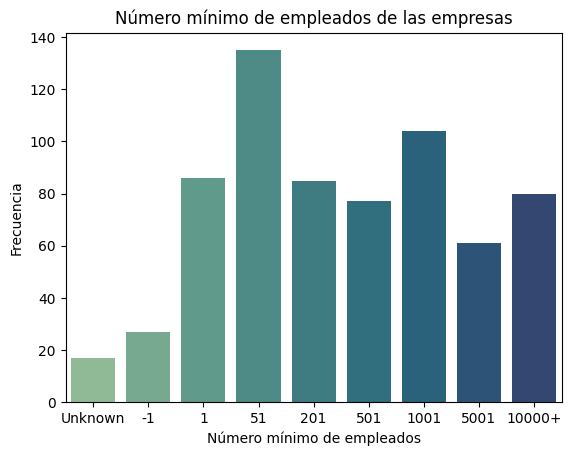

In [8]:
sns.countplot(x='Size_min', data=df,palette='crest',order=['Unknown','-1','1','51','201','501','1001','5001','10000+'])

# añade etiquetas a los ejes y título a la gráfica
plt.xlabel('Número mínimo de empleados')
plt.ylabel('Frecuencia')
plt.title('Número mínimo de empleados de las empresas')

# muestra la gráfica
plt.show()

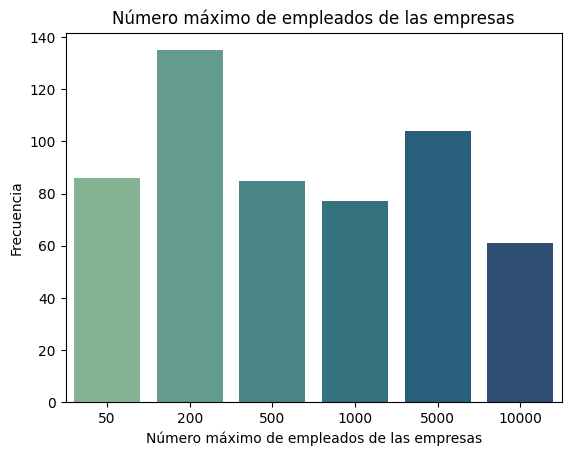

In [9]:
sns.countplot(x='Size_max', data=df,palette='crest',order=['50','200','500','1000','5000','10000'])

# añade etiquetas a los ejes y título a la gráfica
plt.xlabel('Número máximo de empleados de las empresas')
plt.ylabel('Frecuencia')
plt.title('Número máximo de empleados de las empresas')

# muestra la gráfica
plt.show()

In [10]:
def classify_companies(num_empleados):
    if num_empleados < 500:
        return "Small business"
    elif num_empleados <1000:
        return "Medium business"
    elif num_empleados >1000:
        return "Large business"
    else:
        return "Unknown"


In [11]:
df['Size_max'] = df['Size_max'].fillna(0)
df['Size_max'] = df['Size_max'].astype(int)
df['Size'] = df['Size_max'].apply(classify_companies)

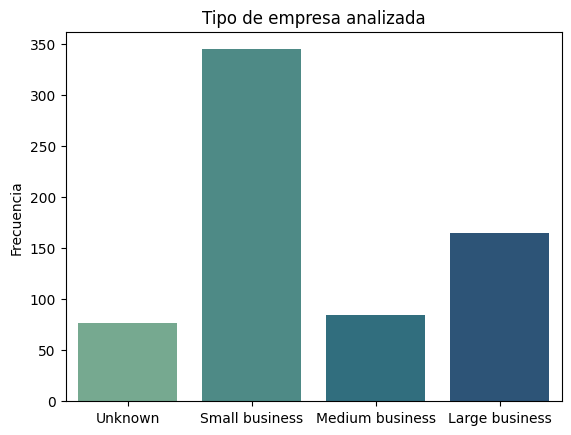

In [12]:
sns.countplot(x='Size', data=df,palette='crest', order=["Unknown","Small business",'Medium business','Large business'])

plt.xlabel('')
plt.ylabel('Frecuencia')
plt.title('Tipo de empresa analizada')
plt.show()

In [13]:
df.loc[ df['Size'] =='Unknown', 'Size'] = 0
df.loc[df['Size'] =='Small business', 'Size'] = 1
df.loc[df['Size'] =='Medium business', 'Size']   = 2
df.loc[ df['Size'] =='Large business', 'Size'] = 3
df['Size'] = df['Size'].astype(int)

The column related to Type of ownership is given in an irregular format depending on the type, as when the company is public or private, it is accompanied by a hyphen and the word "company." The column is divided so that only the type of company is obtained. The different existing categories are analyzed, and they are grouped in such a way that the number of categories is reduced to 5. This grouping is done in order to generalize better, as not doing so would result in a very low number of observations for each type. Therefore, more general adjectives are used.

In [14]:
owner = df["Type of ownership"].str.split('-',expand=True)
owner.columns = ['Type_ownership1', 'Type_ownership2']
df = pd.concat([df, owner], axis=1)

In [15]:
df['Type_ownership'] = np.where(df['Type_ownership1'] != 'Company ', df['Type_ownership1'], df['Type_ownership2'])
df = df.drop(['Type_ownership1'], axis=1)
df = df.drop(['Type_ownership2'], axis=1)
df['Type_ownership'] = df['Type_ownership'].fillna(0)

In [16]:
df['Type_ownership']

0       Nonprofit Organization
1                       Public
2      Private Practice / Firm
3                       Public
4                      Private
                ...           
667                    Private
668                           
669                           
670                    Private
671                     Public
Name: Type_ownership, Length: 672, dtype: object

In [17]:
tabla = df['Type_ownership'].value_counts()
tabla = tabla.reset_index()
tabla.columns = ['Type of ownership', 'Frecuencia']
tabla

Type of ownership  Frecuencia
0                          Private         397
1                           Public         153
2           Nonprofit Organization          36
3   Subsidiary or Business Segment          28
4                                           27
5                       Government          10
6               Other Organization           5
7          Private Practice / Firm           4
8                          Unknown           4
9             College / University           3
10                            Self           2
11                        Contract           2
12                        Hospital           1

In [18]:
df['Type_ownership'] = df['Type_ownership'].replace(['', 'Other Organization','Unknown'], 'Unknown')
df['Type_ownership'] = df['Type_ownership'].replace(['Self','Private Practice / Firm','Contract'], ' Private')
df['Type_ownership'] = df['Type_ownership'].replace(['College / University','Hospital','Government'], ' Public')
df['Type_ownership'] = df['Type_ownership'].replace(['Subsidiary or Business Segment'], 'Business')

In [19]:
tabla = df['Type_ownership'].value_counts()
tabla = tabla.reset_index()
tabla.columns = ['Type of ownership', 'Frecuencia']
tabla

Type of ownership  Frecuencia
0                 Private         405
1                  Public         167
2  Nonprofit Organization          36
3                 Unknown          36
4                Business          28

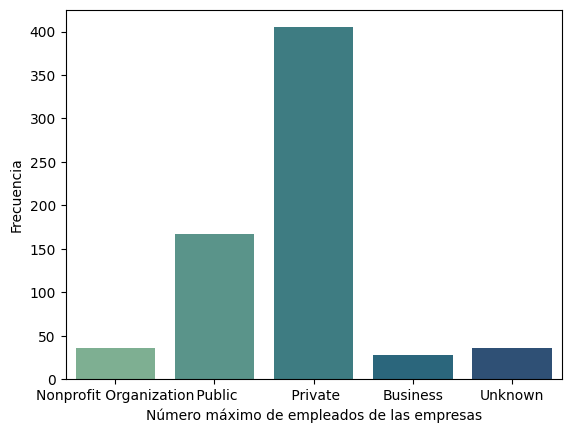

In [20]:
sns.countplot(x='Type_ownership', data=df,palette='crest')

# añade etiquetas a los ejes y título a la gráfica
plt.xlabel('Número máximo de empleados de las empresas')
plt.ylabel('Frecuencia')
plt.title('')

# muestra la gráfica
plt.show()

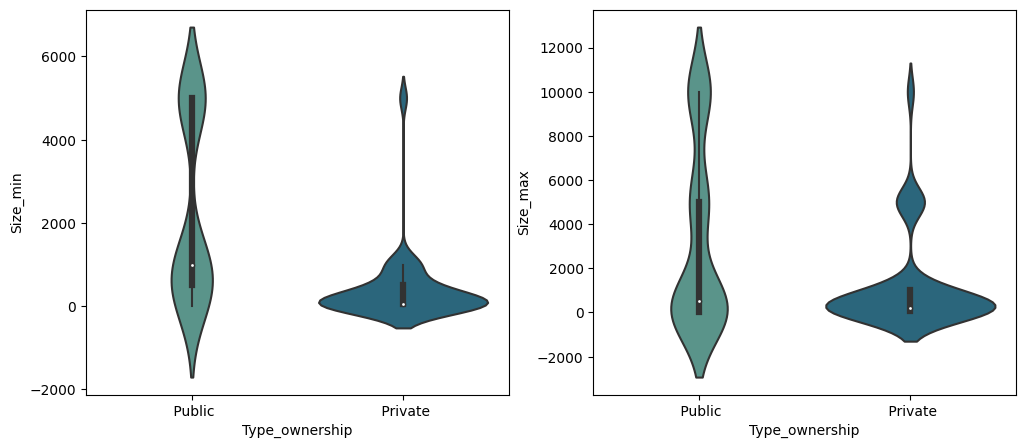

In [21]:
df['Size_min'] = pd.to_numeric(df['Size_min'], errors='coerce')
df['Size_max'] = pd.to_numeric(df['Size_max'], errors='coerce')

df_publicvsprivate = df[df['Type_ownership'].isin([' Public', ' Private'])]
fig, axs = plt.subplots(ncols=2, figsize=(12,5))

# Graficar un violinplot de la columna "categoria" solo para las categorías "A" y "B"
sns.violinplot(x='Type_ownership', y='Size_min', data=df_publicvsprivate,palette='crest',ax=axs[0])
sns.violinplot(x='Type_ownership', y='Size_max', data=df_publicvsprivate,palette='crest',ax=axs[1])
plt.ylabel('Size_max')
plt.show()

In [22]:
pivot_table = df.pivot_table(index='Type_ownership', columns='Size', values='Rating', aggfunc='mean')
print(pivot_table)

Size                           0         1         2         3
Type_ownership                                                
 Private                3.783333  3.686486  4.080597  3.596774
 Public                 3.545455  3.707692  3.387500  3.718571
Business                4.160000  3.828571  3.975000  3.500000
Nonprofit Organization  3.328571  3.250000  3.500000  3.765217
Unknown                      NaN -0.391176       NaN  2.900000


In [23]:
df.loc[ df['Type_ownership'] == 'Unknown', 'Type_ownership'] = 0
df.loc[df['Type_ownership'] == 'Business', 'Type_ownership'] = 1
df.loc[df['Type_ownership'] == 'Nonprofit Organization', 'Type_ownership']   = 2
df.loc[ df['Type_ownership'] == ' Public', 'Type_ownership'] = 3
df.loc[ df['Type_ownership'] == ' Private','Type_ownership'] = 4
df['Type_ownership'] = df['Type_ownership'].astype(int)


Regarding the **longevity** of the company, it is expressed based on the year of foundation. It is considered appropriate to transform this variable into ranges of age. For this purpose, the datetime function is used, which compares the current year with the year of foundation each time it is executed. Five segments are defined, which do not cover the same number of years but attempt to have a similar number of observations in each segment.

In [24]:
from datetime import datetime

def def_seniority(founded):
    # Obtener el año actual
    year_actual = datetime.now().year

    # Calcular la antigüedad de la empresa
    company_tenure = year_actual - founded

    # Definir los rangos de antigüedad
    if founded == -1:
        return "Unknown"
    elif company_tenure < 15:
        return "Menos de 15 años"
    elif company_tenure < 25:
        return "15-25 años"
    elif company_tenure < 45:
        return "25-45 años"
    else:
        return "45 años o más"

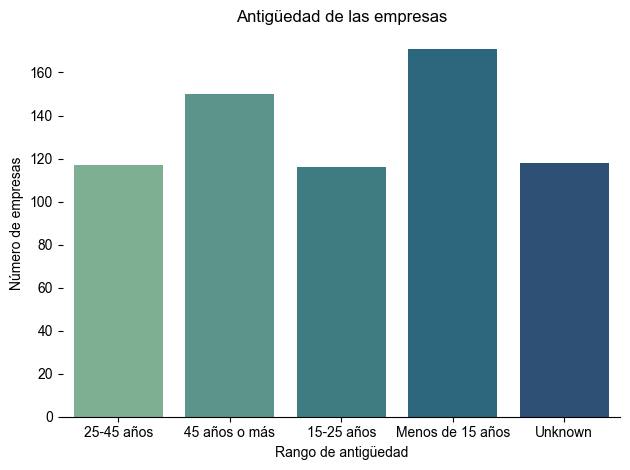

In [25]:
df['company_tenure'] = df['Founded'].apply(def_seniority)

sns.countplot(x='company_tenure', data=df, palette='crest')
plt.xlabel('Rango de antigüedad')
plt.ylabel('Número de empresas')
plt.title('Antigüedad de las empresas')

sns.set_style('whitegrid')
sns.despine(left=True)
plt.tight_layout()
plt.show()

In [26]:
df.loc[ df['company_tenure'] == 'Unknown', 'company_tenure'] = 0
df.loc[df['company_tenure'] == 'Menos de 15 años', 'company_tenure'] = 1
df.loc[df['company_tenure'] == '15-25 años', 'company_tenure']   = 2
df.loc[ df['company_tenure'] == '25-45 años', 'company_tenure'] = 3
df.loc[ df['company_tenure'] == '45 años o más','company_tenure'] = 4
df['company_tenure'] = df['company_tenure'].astype(int)
df = df.drop(['Type of ownership'], axis=1)


In the database, there is information related to the industry and the sector in which the company operates. It has been decided to use the variable **Sector** for the study, as the number of categories is smaller and easier to group. The same methodology is followed as with **Type_ownership**.

In [27]:
tabla = df['Sector'].value_counts()
tabla = tabla.reset_index()
tabla.columns = ['Sector', 'Frecuencia']
tabla

Sector  Frecuencia
0               Information Technology         188
1                    Business Services         120
2                                   -1          71
3            Biotech & Pharmaceuticals          66
4                  Aerospace & Defense          46
5                              Finance          33
6                            Insurance          32
7                        Manufacturing          23
8                          Health Care          21
9                           Government          17
10        Oil, Gas, Energy & Utilities          10
11                              Retail           7
12                  Telecommunications           7
13          Transportation & Logistics           6
14                               Media           5
15                         Real Estate           3
16                    Travel & Tourism           3
17              Agriculture & Forestry           3
18                           Education           3
19                  Accounting & Legal           3
20  Construction, Repair & Maintenance           2
21                   Consumer Services           2
22                          Non-Profit           1

In [28]:
df['Sector'] = df['Sector'].replace(['Biotech & Pharmaceuticals','Health Care'], 'Health')
df['Sector'] = df['Sector'].replace(['Information Technology','Aerospace & Defense','Government','Telecommunications','Oil, Gas, Energy & Utilities','Agriculture & Forestry','Construction, Repair & Maintenance'], 'Engineering')
df['Sector'] = df['Sector'].replace(['Consumer Services','Business Services','Finance',], 'Business')
df['Sector'] = df['Sector'].replace(['Transportation & Logistics','Manufacturing'], 'Logistics')
df['Sector'] = df['Sector'].replace(['Accounting & Legal','Real Estate','Government','Insurance'], 'Law')
df['Sector'] = df['Sector'].replace(['-1','Non-Profit','Retail', 'Media','Travel & Tourism','Government','Education'], 'Other')

In [29]:
tabla = df['Sector'].value_counts()
tabla = tabla.reset_index()
tabla.columns = ['Sector', 'Frecuencia']
tabla

Sector  Frecuencia
0  Engineering         273
1     Business         155
2        Other          90
3       Health          87
4          Law          38
5    Logistics          29

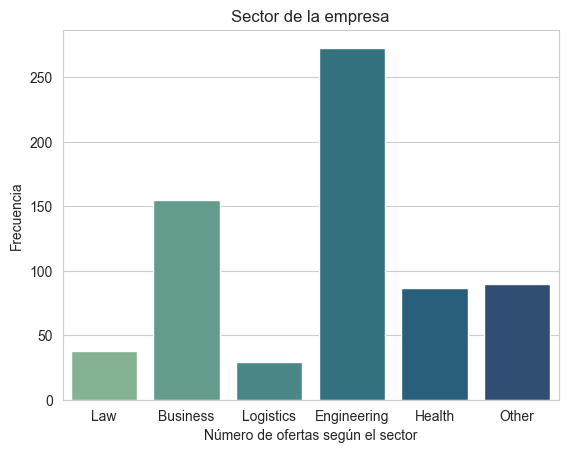

In [30]:
sns.countplot(x='Sector', data=df,palette='crest')

# añade etiquetas a los ejes y título a la gráfica
plt.xlabel('Número de ofertas según el sector')
plt.ylabel('Frecuencia')
plt.title('Sector de la empresa')

# muestra la gráfica
plt.show()

When it comes to choosing a sector to work in and the quality of the offers offered by Glassdoor, it is interesting to compare the ratings given by users by sector. It is observed that in most cases, the average rating is similar, with a deviation depending on the sector.

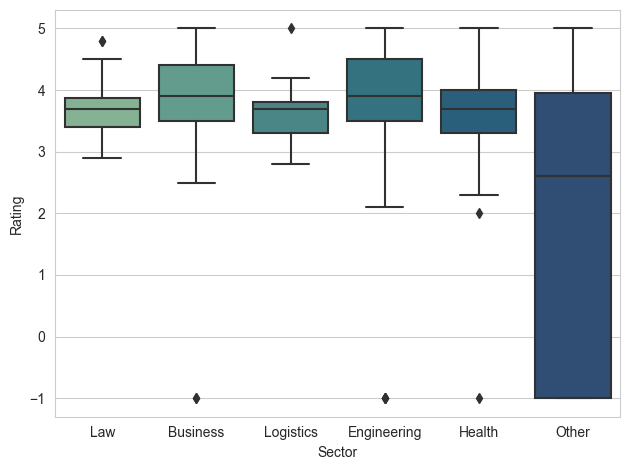

In [31]:
sns.boxplot(x = 'Sector', y = 'Rating', data = df,palette='crest')
plt.tight_layout()
plt.show()

In [32]:
df.loc[ df['Sector'] =='Logistics', 'Sector'] = 0
df.loc[df['Sector'] =='Law', 'Sector'] = 1
df.loc[df['Sector'] =='Health', 'Sector']   = 2
df.loc[ df['Sector'] =='Other', 'Sector'] = 3
df.loc[ df['Sector'] =='Business', 'Sector'] = 4
df.loc[ df['Sector'] =='Engineering', 'Sector'] = 5
df['Sector'] = df['Sector'].astype(int)

For the treatment of locations, the database has two columns involved: one with the location of the company and another corresponding to where the boss to whom the worker reports is located. First, the **Location** column has been transformed using the geopy library. By defining the **get_coordinates** function, the coordinates of the city are obtained, which are then broken down into latitude and longitude.

In [33]:
!pip install geopy

In [34]:
import pandas as pd
from geopy.geocoders import Nominatim

In [35]:
geolocator = Nominatim(user_agent="my_app")

In [36]:
def get_coordinates(city):
    location = geolocator.geocode(city + ", USA")
    return (location.latitude, location.longitude)

In [37]:
df['Coordenadas'] = df['Location'].apply(get_coordinates)

In [38]:
df[['Latitud', 'Longitud']] = pd.DataFrame(df['Coordenadas'].tolist(), index=df.index)

In [39]:
frec_location = df['Location'].value_counts()
categorias_comunes = frec_location.head(5).index.tolist()

<AxesSubplot: xlabel='Location', ylabel='count'>

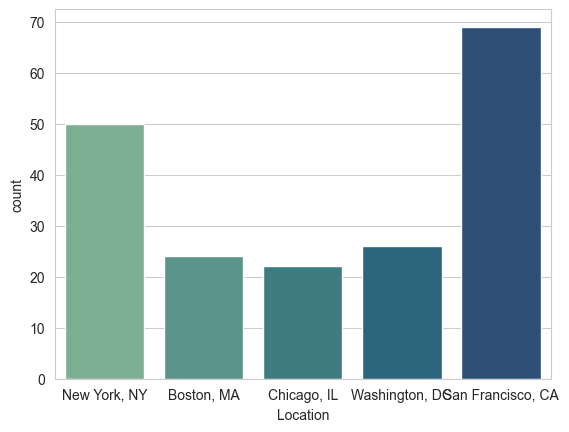

In [40]:
datos_filtrados = df.loc[df['Location'].isin(categorias_comunes)]

# Crear el countplot con las categorías seleccionadas
sns.countplot(x='Location', data=datos_filtrados,palette='crest')

In [41]:
import folium
mapa = folium.Map(location=[39.8283, -98.5795], zoom_start=4)
frecuencias = df['Location'].value_counts()

for index, row in df.iterrows():
    ciudad = row['Location']
    latitud = row['Latitud']
    longitud = row['Longitud']
    ofertas = frecuencias

    marcador = folium.Marker(location=[latitud, longitud], tooltip=f'{ofertas} ofertas en {ciudad}')
    marcador.add_to(mapa)
mapa

Regarding Headquearters, a new binary column has been created so that it takes the value 1 when the location of the boss and the company match, and 0 otherwise.

In [42]:
def location_comparer(df, col1, col2, new_col_name):
    # crea una nueva columna con 0 por defecto
    df[new_col_name] = 0
    
    # compara los valores de las dos columnas y asigna 1 a la nueva columna si son iguales
    df.loc[df[col1] == df[col2], new_col_name] = 1
    
    return df

In [43]:
df = location_comparer(df, 'Location', 'Headquarters', 'Unique_location')

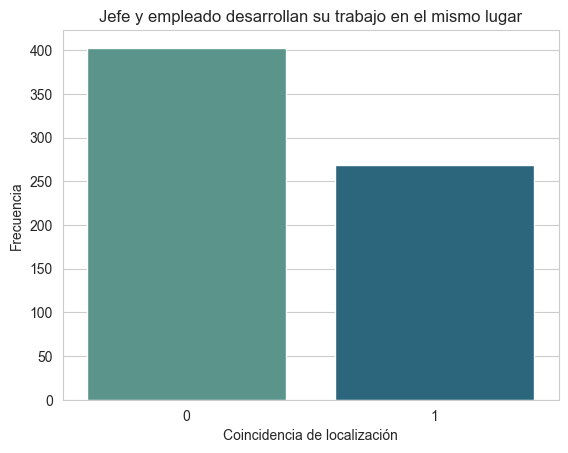

In [44]:
sns.countplot(x='Unique_location', data=df,palette='crest')

# añade etiquetas a los ejes y título a la gráfica
plt.xlabel('Coincidencia de localización')
plt.ylabel('Frecuencia')
plt.title('Jefe y empleado desarrollan su trabajo en el mismo lugar')

# muestra la gráfica
plt.show()
df = df.drop(['Headquarters'], axis=1)

The variables Salary and Revenue are expressed in ranges but as character-type variables. Therefore, it is necessary to make transformations to the variables, and the ranges will also be restructured.

In [45]:
df['min_salary']=0
df['max_salary']=0
df['avg_salary']=0
for i in range(len(df)):
    try:
        df.loc[i,"min_salary"]=int(df['Salary Estimate'][i].split(" ")[0].split("-")[0].replace("$","").replace("K",""))
        df.loc[i,"max_salary"]=int(df['Salary Estimate'][i].split(" ")[0].split("-")[1].replace("$","").replace("K",""))
    except:
        df.loc[i,"min_salary"]=int(df['Salary Estimate'][i].split("(E")[0].split("-")[0].replace("$","").replace("K",""))
        df.loc[i,"max_salary"]=int(df['Salary Estimate'][i].split("(E")[0].split("-")[1].replace("$","").replace("K",""))
    finally:
        df.loc[i,"Salary Estimate"]=str(df.loc[i,"min_salary"])+"-"+str(df.loc[i,"max_salary"])
        df.loc[i,"avg_salary"]=np.mean([df.loc[i,"min_salary"],df.loc[i,"max_salary"]])

In [46]:
df = df.drop(['Salary Estimate'], axis=1)
df = df.drop(['Revenue'], axis=1)

C:\Users\lulac\AppData\Local\Temp\ipykernel_10420\1208869820.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='avg_salary', data=df,palette='crest')


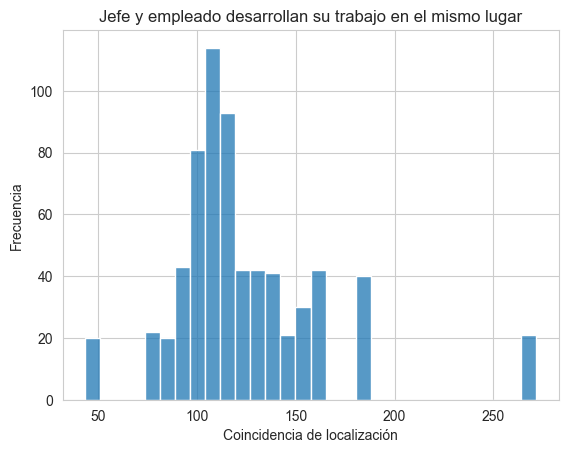

In [47]:
sns.histplot(x='avg_salary', data=df,palette='crest')

# añade etiquetas a los ejes y título a la gráfica
plt.xlabel('Coincidencia de localización')
plt.ylabel('Frecuencia')
plt.title('Jefe y empleado desarrollan su trabajo en el mismo lugar')

# muestra la gráfica
plt.show()


The variables that are not necessary for logistic regression are removed, and a copy of the dataset up to this point is created, which will be necessary later.

In [48]:
df = df.drop(['Location'], axis=1)
df = df.drop(['Size_min'], axis=1)
df = df.drop(['Size_max'], axis=1)
df = df.drop(['Industry'], axis=1)
df = df.drop(['Coordenadas'], axis=1)
df = df.drop(['Founded'], axis=1)

In [49]:
df2=df

In [50]:
cat1_max = 100
cat2_max = 113
cat3_max = 140
cat4_max = 300

def asignar_categoria(df):
    salario_promedio = (df['min_salary'] + df['max_salary']) / 2
    if salario_promedio <= cat1_max:
        return 1
    elif salario_promedio <= cat2_max:
        return 2
    elif salario_promedio <= cat3_max:
        return 3
    elif salario_promedio <= cat4_max:
        return 4
    else:
        return 5

df['salary'] = df.apply(asignar_categoria, axis=1)

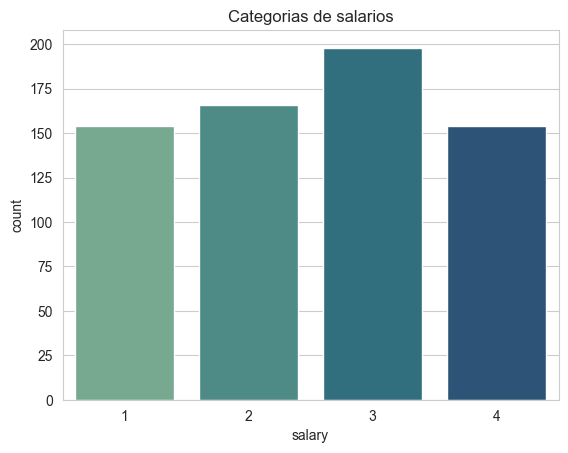

In [51]:
sns.countplot(x='salary', data=df,palette='crest')

plt.title('Categorias de salarios')
plt.show()

### DISTRIBUTION VISUALIZATION, OUTLIER IDENTIFICATION, AND CORRELATION.

Once the transformation of variables is complete, a visualization of the quantitative variables is performed, which helps to better understand the current state of the database.

C:\Users\lulac\AppData\Local\Temp\ipykernel_10420\2490253124.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['min_salary'])


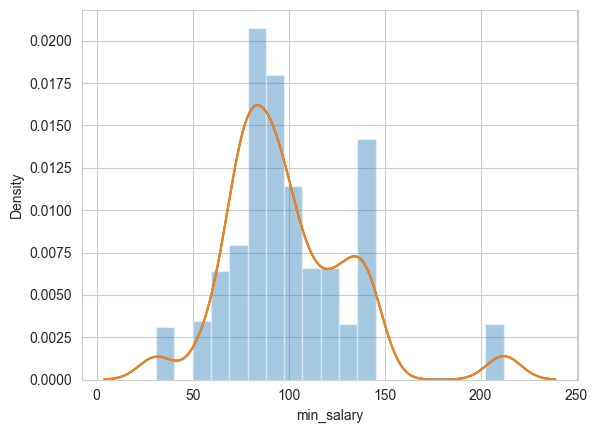

C:\Users\lulac\AppData\Local\Temp\ipykernel_10420\2490253124.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['max_salary'])


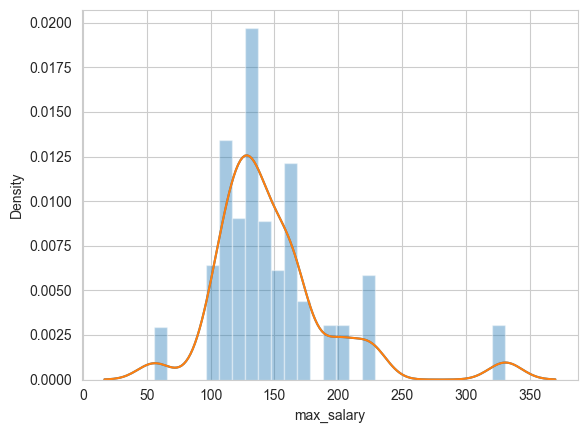

In [52]:
sns.distplot(df['min_salary'])
sns.kdeplot(df['min_salary'])
plt.show()

sns.distplot(df['max_salary'])
sns.kdeplot(df['max_salary'])
plt.show()


The existence of outliers is analyzed once the variables have been transformed. These outliers will be removed even though, being so scarce, they will not have an influence on the model.

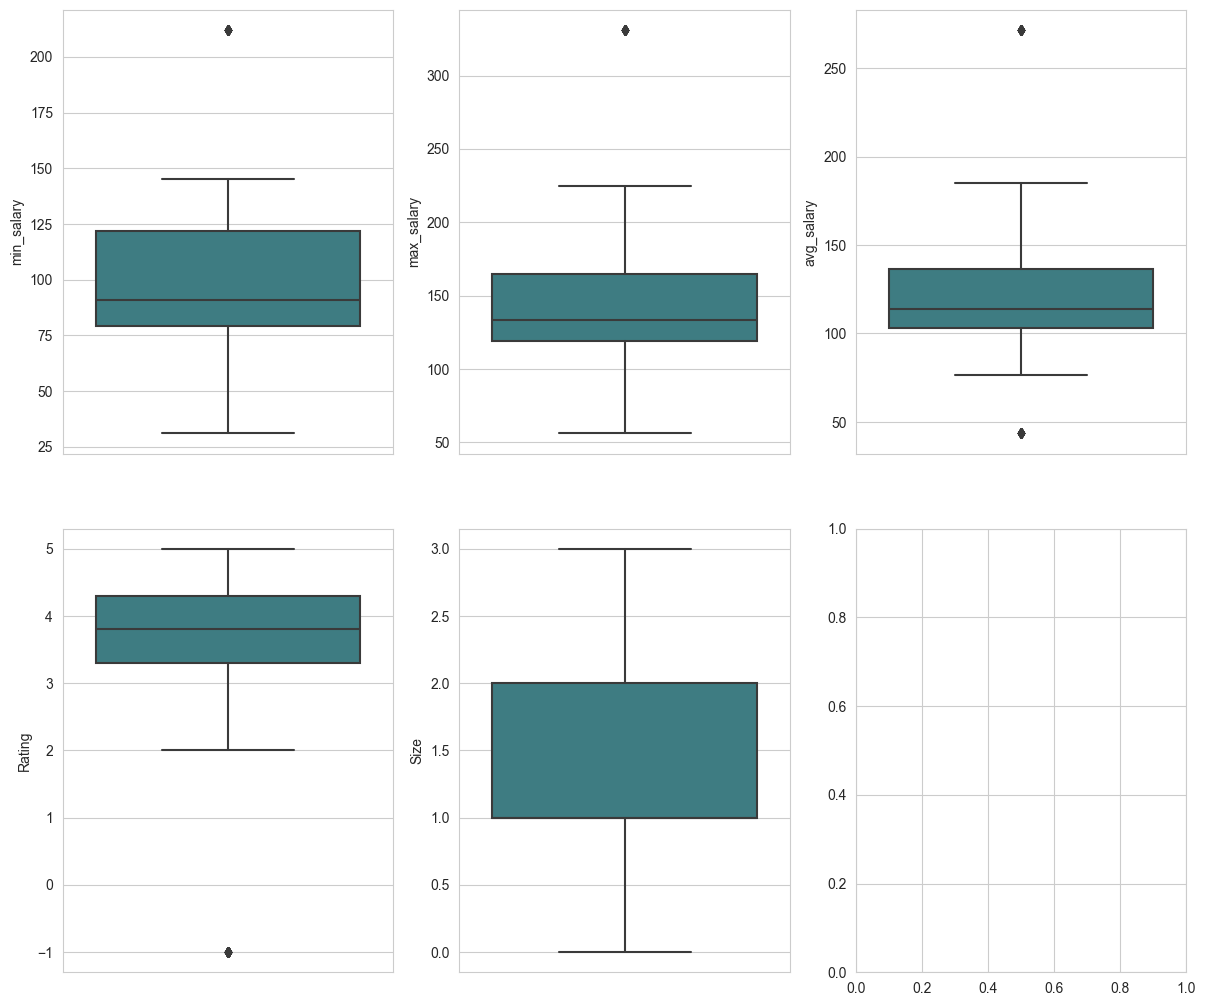

In [53]:
colsNumeros = ['min_salary','max_salary','avg_salary','Rating','Size']
fig,ax=plt.subplots(2,3,figsize=(12,10))
index=0
ax=ax.flatten()
for col in colsNumeros:
    sns.boxplot(y=col, data=df, color='b', ax=ax[index],palette='crest')
    index+=1
plt.tight_layout(pad=0.5, w_pad=1, h_pad=5.0)

In [54]:
def get_percentile(df, percentile_rank, column):
    
    # First, sort by ascending gdp, reset the indices
    df = df.sort_values(by=column).reset_index()
    
    index = (len(df.index)-1) * percentile_rank / 100.0
    index = int(index)
    
    return (df.at[index, column])
def interquartile_range(df,column):
    
    p75 = get_percentile(df, 75,column)  # 75th percentile country and gdp
    p25 = get_percentile(df, 25,column)  # 25th percentile country and gdp
    iqr = p75 - p25  # Interquartile Range
    return iqr
def get_outliers(df,column,k=1.5):
    
    # Compute the 25th percentile, the 75th percentile and the IQR
    p25 = get_percentile(df, 25,column)
    p75 = get_percentile(df, 75,column)
    iqr = interquartile_range(df,column)
    
    # "Minimum non-outlier value": 25th percentile - 1.5 * IQR
    min_val = p25 - k*iqr
    # "Maximum non-outlier value": 75th percentile + 1.5 * IQR
    max_val = p75 + k*iqr
    #print(min_val,max_val)
    
    outliers = df[(df[column] < min_val) | (df[column] > max_val)].index #añadi .index sobre el codigo de la clase anterior
    return outliers
  
def detect_outliers(columns,df):
    outlier_indices = []

    for column in columns:        
        outlier_indices.extend(get_outliers(df,column))
        return outlier_indices

In [55]:
print(len(df))
df = df.drop(detect_outliers(colsNumeros,df),axis = 0).reset_index(drop = True)
print(len(df))
df.head()

672
651


df_index  Rating  Sector  Size  Type_ownership  company_tenure    Latitud  \
0         0     3.1       1     3               2               3  40.712728   
1         1     4.2       4     3               3               4  38.878836   
2         2     3.8       4     3               4               3  42.355433   
3         3     3.5       0     0               3               2  42.337041   
4         4     2.9       4     1               4               3  40.712728   

    Longitud  Unique_location  min_salary  max_salary  avg_salary  salary  
0 -74.006015                1         137         171       154.0       4  
1 -77.402217                0         137         171       154.0       4  
2 -71.060511                1         137         171       154.0       4  
3 -71.209221                0         137         171       154.0       4  
4 -74.006015                1         137         171       154.0       4


After removing the outliers, the existing correlation between the variables is analyzed.

<AxesSubplot: >

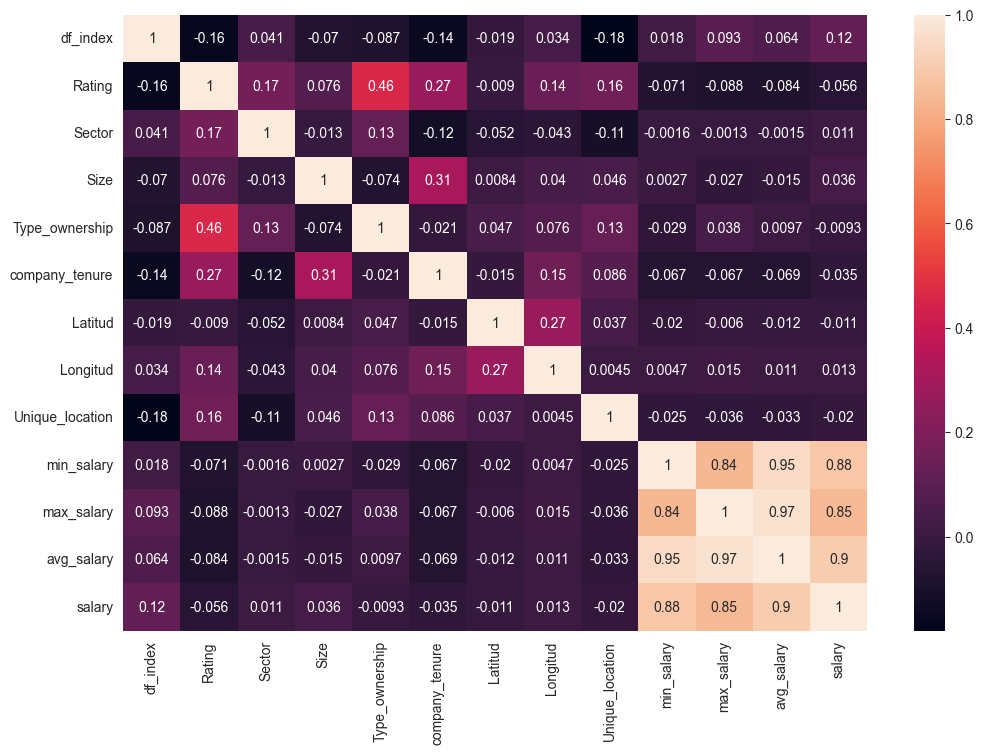

In [56]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)


Once the correlation matrix is analyzed, it is considered to remove the variables of minimum and maximum since the information they gather is included in the "salary" variable. It is decided to remove only one of them because the "salary" variable represents the average between the values and has been transformed into a categorical variable, which has been divided into four different categories. Therefore, some information could be lost if both were removed.

In [57]:
df = df.drop(['min_salary'], axis=1)
df = df.drop(['avg_salary'], axis=1)

### MODELING AND RESULTS ANALYSIS

#### MODEL A


Modeling is carried out using logistic regression, and the results will be analyzed subsequently.

In [58]:
X = df.drop('salary',axis = 1)
y = df['salary']

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Intercept:", model.intercept_)
print("Coeficiente:", model.coef_)
print("Precisión del modelo datos de entrenamiento (train):", model.score(X_train,y_train))
print("Precisión del modelo datos de validación (test):", model.score(X_test,y_test))

Intercept: [-2.0480734   1.2260578   1.63221256 -0.81019696]
Coeficiente: [[-6.63451407e-02 -1.99566806e-01  1.00263095e-01 -1.11937776e-01
   1.32698910e-01  1.47096271e-01 -1.54612607e-01  6.42994206e-02
   1.98548187e-02 -5.97683876e+00]
 [-6.24440459e-02 -2.07777743e-01 -3.62934450e-04 -1.11307768e-01
   1.97732804e-01  2.40768866e-02  1.77535355e-01 -1.04765373e-01
  -6.28565480e-02 -5.04848905e-01]
 [ 1.63196525e-01  8.72588941e-02  6.09175598e-02  1.79644783e-01
  -2.45899721e-01 -5.88591874e-02  3.16210019e-02 -9.05508622e-02
  -1.03661937e-01  1.47007273e+00]
 [-3.44073378e-02  3.20085656e-01 -1.60817720e-01  4.36007609e-02
  -8.45319923e-02 -1.12313971e-01 -5.45437501e-02  1.31016815e-01
   1.46663666e-01  5.01161494e+00]]
Precisión del modelo datos de entrenamiento (train): 0.7626373626373626
Precisión del modelo datos de validación (test): 0.7346938775510204


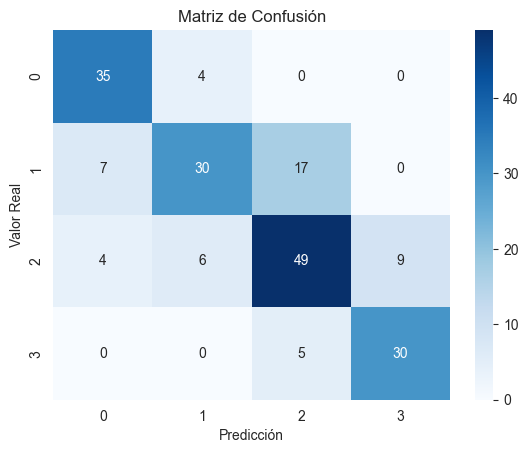

In [61]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues")

# Añadir etiquetas al gráfico
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

In [62]:
# Evaluación mediante validación cruzada
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', random_state=0, max_iter=200)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=7)
print(scores)
print('Precisión del modelo con CV: %.3f (%.3f)' % (mean(scores), std(scores)))

C:\Users\lulac\.conda\envs\UNAV\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\lulac\.conda\envs\UNAV\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lulac\.conda\envs\UNAV\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.war

[0.59139785 0.67741935 0.93548387 0.55913978 0.55913978 0.7311828
 0.5483871 ]
Precisión del modelo con CV: 0.657 (0.130)


C:\Users\lulac\.conda\envs\UNAV\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lulac\.conda\envs\UNAV\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\lulac\.conda\envs\UNAV\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) o

#### MODEL B

Starting from this model as a base, the variables defined in ranges with mean encoding are transformed. Instead of assigning an arbitrary label or number to each category, Mean Encoding uses information from the target variable to assign a numerical value to each category.

In [63]:
df1=df

In [64]:
print(df1.groupby(['company_tenure'])['salary'].mean())
Mean_encoded_subject = df1.groupby(['company_tenure'])['salary'].mean().to_dict()
df1['company_tenure'] =  df1['company_tenure'].map(Mean_encoded_subject)

company_tenure
0    2.675676
1    2.415663
2    2.385965
3    2.443478
4    2.489655
Name: salary, dtype: float64


In [65]:
print(df1.groupby(['Size'])['salary'].mean())
Mean_encoded_subject = df1.groupby(['Size'])['salary'].mean().to_dict()
df1['Size'] =  df1['Size'].map(Mean_encoded_subject)

Size
0    2.293333
1    2.529940
2    2.243902
3    2.568750
Name: salary, dtype: float64


In [66]:
print(df1.groupby(['Sector'])['salary'].mean())
Mean_encoded_subject = df1.groupby(['Sector'])['salary'].mean().to_dict()
df1['Sector'] =  df1['Sector'].map(Mean_encoded_subject)

Sector
0    2.620690
1    2.236842
2    2.369048
3    2.639535
4    2.500000
5    2.462687
Name: salary, dtype: float64


In [67]:
print(df1.groupby(['Type_ownership'])['salary'].mean())
Mean_encoded_subject = df1.groupby(['Type_ownership'])['salary'].mean().to_dict()
df1['Type_ownership'] =  df1['Type_ownership'].map(Mean_encoded_subject)

Type_ownership
0    2.771429
1    1.964286
2    2.393939
3    2.566879
4    2.457286
Name: salary, dtype: float64


<AxesSubplot: >

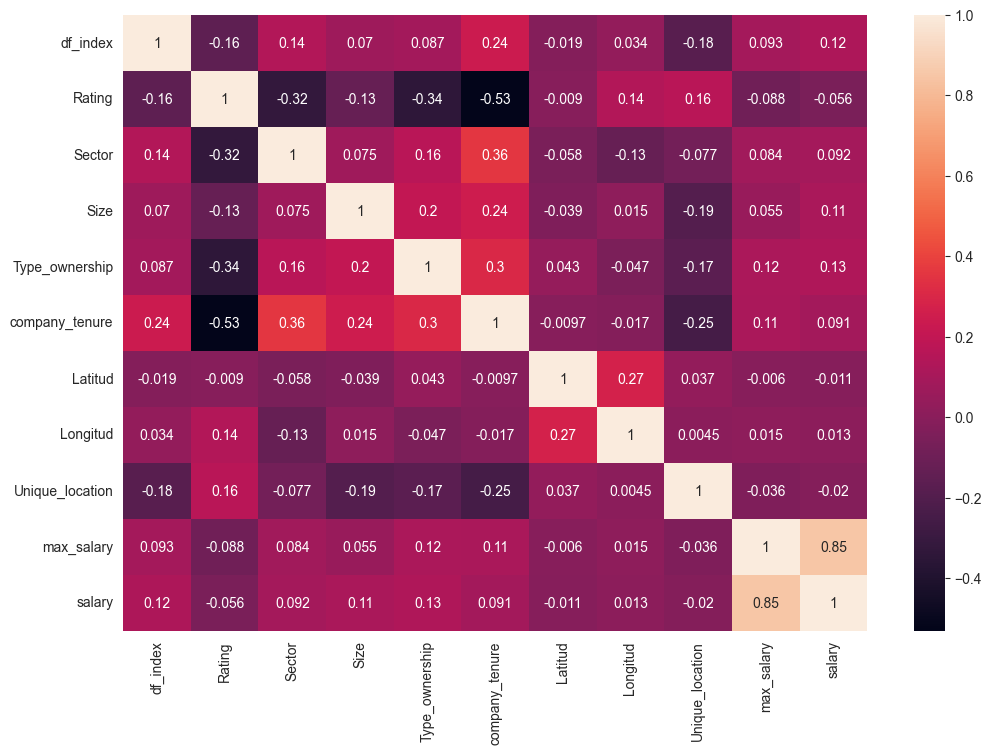

In [68]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True)

In [69]:
X = df1.drop('salary',axis = 1)
y = df1['salary']

In [70]:
# División Conjunto de Datos Entrenamiento / Test
# Controlamos la reproducibilidad en la división con random_state = 0
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Intercept:", model.intercept_)
print("Coeficiente:", model.coef_)
print("Precisión del modelo datos de entrenamiento (train):", model.score(X_train,y_train))
print("Precisión del modelo datos de validación (test):", model.score(X_test,y_test))

Intercept: [-1.9956356   1.277053    1.64572437 -0.92714177]
Coeficiente: [[-4.63043647e-02 -2.62553030e-01 -1.45582669e-01 -1.62441827e-01
  -1.64990960e-01 -1.32536570e-01 -1.91216401e-01  7.86454232e-02
  -7.06546560e-02 -5.92579929e+00]
 [-7.40032823e-02 -1.46801356e-01 -1.19643478e-02 -6.93717324e-02
  -1.92814424e-01  9.98133727e-02  2.01477932e-01 -1.22941301e-01
  -5.05265160e-02 -5.39416332e-01]
 [ 1.85332324e-01 -5.23049705e-03  1.33854541e-02  3.19449499e-02
   1.42700633e-01 -9.49652834e-02  2.47966348e-02 -9.31577961e-02
  -1.19322877e-01  1.41243353e+00]
 [-6.50246767e-02  4.14584883e-01  1.44161563e-01  1.99868610e-01
   2.15104750e-01  1.27688481e-01 -3.50581660e-02  1.37453674e-01
   2.40504049e-01  5.05278209e+00]]
Precisión del modelo datos de entrenamiento (train): 0.7670329670329671
Precisión del modelo datos de validación (test): 0.7755102040816326


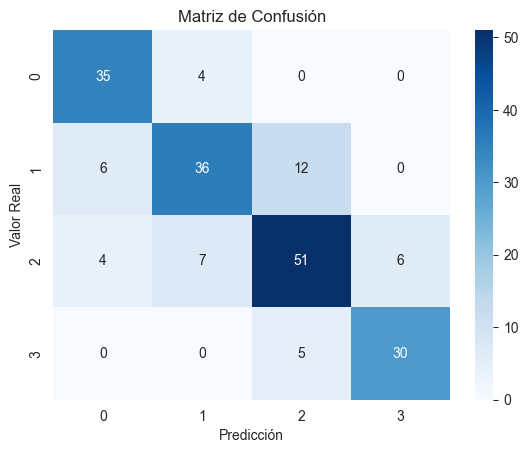

In [72]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues")

# Añadir etiquetas al gráfico
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

In [73]:
# Evaluación mediante validación cruzada
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', random_state=0, max_iter=200)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=7)
print(scores)
print('Precisión del modelo con CV: %.3f (%.3f)' % (mean(scores), std(scores)))

C:\Users\lulac\.conda\envs\UNAV\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\lulac\.conda\envs\UNAV\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lulac\.conda\envs\UNAV\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.war

[0.52688172 0.64516129 0.94623656 0.53763441 0.55913978 0.72043011
 0.53763441]
Precisión del modelo con CV: 0.639 (0.142)


C:\Users\lulac\.conda\envs\UNAV\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### MODEL C


Due to the belief that most of the incorrect results are due to the existence of a category with very close boundaries, it has been decided to reset these ranges.

In [95]:
cat1_max = 90
cat2_max = 120
cat3_max = 150

# definir una función para asignar una categoría numérica basada en el salario
def asignar_categoria(df2):
    salario_promedio =df2['avg_salary']
    if salario_promedio <= cat1_max:
        return 0
    elif salario_promedio <= cat2_max:
        return 1
    elif salario_promedio <= cat3_max:
        return 2
    else:
        return 3

df2['salary'] = df2.apply(asignar_categoria, axis=1)

In [96]:
columns=['Type_ownership','Size','Sector','company_tenure']
for x in columns:
    df1.groupby([x])['salary'].mean()
    Mean_encoded_subject = df1.groupby([x])['salary'].mean().to_dict()
    df1[x] =  df1[x].map(Mean_encoded_subject)

In [97]:
X = df2.drop('salary',axis = 1)
y = df2['salary']

In [98]:
# División Conjunto de Datos Entrenamiento / Test
# Controlamos la reproducibilidad en la división con random_state = 0
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Estandarizar los datos de prueba
X_test = scaler.transform(X_test)

# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir la variable de respuesta para los datos de prueba
y_pred = model.predict(X_test)

print("Intercept:", model.intercept_)
print("Coeficiente:", model.coef_)
print("Precisión del modelo datos de entrenamiento (train):", model.score(X_train,y_train))
print("Precisión del modelo datos de validación (test):", model.score(X_test,y_test))

Intercept: [-4.27587854  2.67028391  2.89064714 -1.28505251]
Coeficiente: [[ 0.65673523  0.40855096 -0.09275094 -0.0115228  -0.18548519  0.18755631
  -0.00500898 -0.02291184 -0.11097135 -3.85156826 -3.14805635 -3.51888637]
 [-0.17179829 -0.12100431 -0.02444849 -0.16043736  0.12587248  0.03897779
  -0.05337383  0.12264333 -0.1554958   0.1518945  -2.6161542  -1.53308572]
 [ 0.23951111 -0.02299889  0.05083644  0.06263463 -0.12547867 -0.13876249
  -0.00857774 -0.02930157  0.09907214  1.15169753  1.40790112  1.3368721 ]
 [-0.72444805 -0.26454777  0.06636299  0.10932552  0.18509138 -0.08777161
   0.06696055 -0.07042992  0.16739501  2.54797624  4.35630943  3.71509999]]
Precisión del modelo datos de entrenamiento (train): 0.9765957446808511
Precisión del modelo datos de validación (test): 0.9653465346534653


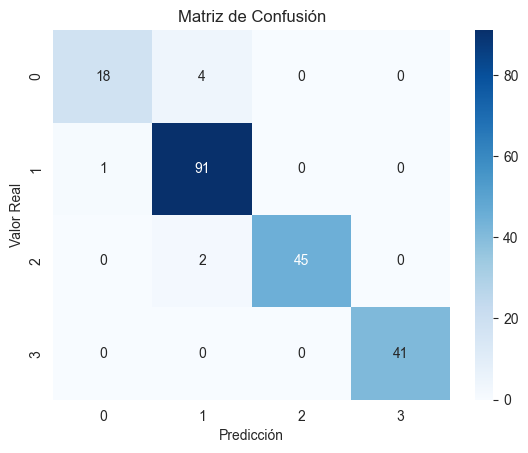

In [101]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues")

# Añadir etiquetas al gráfico
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

In [102]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', random_state=0, max_iter=200)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=7)
print(scores)
print('Precisión del modelo con CV: %.3f (%.3f)' % (mean(scores), std(scores)))

C:\Users\lulac\.conda\envs\UNAV\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\lulac\.conda\envs\UNAV\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lulac\.conda\envs\UNAV\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.war

[0.76041667 0.8125     0.91666667 0.97916667 0.8125     0.82291667
 0.66666667]
Precisión del modelo con CV: 0.824 (0.094)


C:\Users\lulac\.conda\envs\UNAV\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lulac\.conda\envs\UNAV\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\lulac\.conda\envs\UNAV\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) o

### CONCLUSION

Logistic regression can be a useful tool for both employers and job seekers, providing a deeper understanding of salary trends in a specific field or industry. Employers can use this technique to determine the competitiveness of their salary compared to other employers in the same field, and job seekers can use it to obtain an estimate of the salary they can expect to receive.

In the end, a model with very high accuracy has been achieved, but it's important to note that reducing the number of categories in the salary variable results in the loss of valuable information for those interested.